<a href="https://colab.research.google.com/github/lwallac2/Data-Mining-Modules/blob/main/Module4_DataWrangling2_Transformation(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 4: Data Wrangling Part 2**
In this module, you will learn how to
* Transform data
* De-duplicate data
* Substitute data
* Discretize data

**Be sure to expand all the hidden cells, run all the code, and do all the exercises--you will need the techniques for the lesson lab!**

Remember the [Rocky and Bullwinkle video](https://youtu.be/kx3sOqW5zj4)? In this module, you will learn about how to change the lion into the tiger into the bear into the rhino. You will also learn how to summarize the lion and the tiger into a new "big cats" category

#**0. Preparation and Setup**
We are working with our adult dataset again, so we're loading our libraries and our dataset just like last time.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#Reading in the data as adult dataframe
adult = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/adult.data.simplified.csv")

#Verifying that we can see the data
adult.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429


And here is the adult_small dataframe that you built in the previous notebook. We will use it for a small, fast, proof-of-concept before we use more resources for the larger computation.

In [ ]:
adult_small=adult.iloc[70:80,]
adult_small

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
70,19,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Male,32,United-States,41013
71,31,Private,Bachelors,13,Separated,Sales,Own-child,Black,Female,40,United-States,33571
72,29,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,70,United-States,190337
73,23,Private,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,40,United-States,23773
74,79,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,20,United-States,49908
75,27,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Male,40,Mexico,34334
76,40,Private,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Husband,White,Male,40,United-States,47470
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,2,United-States,40188
78,18,Private,11th,7,Never-married,Other-service,Own-child,White,Female,22,United-States,44387
79,31,Local-gov,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,40,United-States,40938


# **1. Data Transformation**
As you have seen, numeric datatypes allow you to do much more fun math than string datatypes. You can count them, sum them, average them, boxplot them ... all that, while string datatypes, well they can be counted, so much is true--but that really is it. 


We want to transform a categorical attribute, in this case 'race', into a numeric datatype. The Python format for this operation is `DataFrame.astype(dtype, copy=True, errors='raise')`
In our case, this would be something like 
* `adult_small.race.astype('int32')`
* `adult_small.race.astype('category')`
* `adult_small.race.astype('category', ordered=True)`

Let's get started. First, let's verify our datatype for 'race'



In [ ]:
adult_small.race.dtypes

dtype('O')

'O' means 'object', which is basically a string value. Let's now transform our 'race' attribute to numeric values. Below are all the steps.

## **1.1 Adding a column with the data we want to transform**
We could theoretically transform the 'race' attribute in place, but if our code causes problems, we could mess up our entire dataframe. So, instead, we will first add a new column into which we will copy the contents of the 'race' attribute. In a second step, we will transform the values in that new column.

Detailed explanations are in the code comments below.

In [ ]:
# Creating a new attribute and populating it with the contents of the attribute that we want to transform.
race_num=adult_small.race

# Adding the new attribute to the dataframe
adult_small['race_num'] = race_num

# Checking the contents of the new attribute
adult_small.race_num

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


70    White
71    Black
72    White
73    White
74    White
75    White
76    White
77    White
78    White
79    White
Name: race_num, dtype: object

In [ ]:
# Let's check the shape now. Instead of 12 attributes, we should have 10 rows and 13 columns now because we have built a new race_num attribute
adult_small.shape

(10, 13)

In [ ]:
# Now that we have the race_num column built, let's check the datatypes of both attributes. 
adult_small.dtypes[['race','race_num']]

race        object
race_num    object
dtype: object

## **1.2 Transforming the values**
To transform an object value to numeric, we need to get the numbers from somewhere. In our case, we will transform the object to category. That gives us the index numbers for the category. Then we will replace the string values with these index numbers for the category--and voila! we have a numeric transformation.
(If you see any attribute replacement warnings as you run the code below, you can ignore them.)

In [ ]:
# Here, we convert the race_num values to categorical (to obtain the index numbers) 
adult_small['race_num']= adult_small['race_num'].astype('category')

# Now we replace the categories with their index numbers, i.e. the category codes
adult_small['race_num']= adult_small['race_num'].cat.codes

# Let's see what the datatypes look like now
adult_small.dtypes[['race','race_num']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


race        object
race_num      int8
dtype: object

In [ ]:
# Now let's display the contents of both attributes to double-check 
adult_small[['race','race_num']]

,race,race_num
70,White,1
71,Black,0
72,White,1
73,White,1
74,White,1
75,White,1
76,White,1
77,White,1
78,White,1
79,White,1


**SUCCESS!** Now that we have worked the code out for our small proof-of-concept dataframe, we can apply it to the entire adult dataframe.

In [ ]:
# First, we back the dataframe up.
adult2=adult

# Now we build the column and copy the original values into it
adult2['race_num'] = adult2.race

# Third, we convert race_num into categorical
adult2['race_num']= adult2['race_num'].astype('category')

# Then, we replace the strings with the category indices
adult2['race_num']= adult2['race_num'].cat.codes

# Now, we check the data types
adult2.dtypes[['race','race_num']]

race        object
race_num      int8
dtype: object

**YAY!** That worked, too. But how did pandas assign the numbers? Let's find out:

In [ ]:
# Making a temporary new dataframe because it's so much easier to work with just 2 attributes
race_exploration=adult2[['race','race_num']]
race2=race_exploration.drop_duplicates()
race2.sort_values(by=['race_num'])

,race,race_num
15,Amer-Indian-Eskimo,0
11,Asian-Pac-Islander,1
3,Black,2
50,Other,3
0,White,4


##**Your Turn**
Explain in a couple of complete sentences the logic with which pandas haa ssigned the numbers for the race_num array.

# **2. De-Duplication**
Check out this line in the example above:
`race2=race_exploration.drop_duplicates()`

This is literally all there is to de-duplication. 
For more on drop_duplicates() see, https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html

# **3. Substituting Values in Dataframes**

OK--tiger, meet lion, and lion--meet rhino! Here is how to substitute values in a dataframe. For this purpose, we will try out the df.replace method shown in https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html. This really convenient method works for strings and numeric values alike.

Here, we will work with the workclass attribute.

In [ ]:
adult3 = adult
adult3.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

### The Problem
Oh, look: We have a '?' value in there. This could be any of the following
* Misformatted data that might have accidentally broken during the E of [ETL](https://www.sas.com/en_us/insights/data-management/what-is-etl.html). 
* Some sort of placeholder character that our data warehouse has inserted for missing values.
* Intentional and supposed to stand for 'Unknown'. 

Whatever it is, we may never know. That is one of the big problems when dealing with big datasets. The next problem is:
**bold text**
> **What are we going to do with it?**

Are we going to just **ignore** the rows in which the '?' appears--or are we going to **do something about it**? To answer that question, it is helpful to know how many rows contain the '?'



In [ ]:
adult3[adult3['workclass'] == '?']

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South-Africa-Africa,134092,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,40,?,21248,4
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,40,United-States,42975,4
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,2,United-States,40188,4
106,17,?,10th,6,Never-married,?,Own-child,White,Female,32,United-States,47415,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,55,United-States,50806,4
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,38437,1
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,10,United-States,137903,4
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,32,United-States,49196,2


Hm. That's 1,836 rows out of 32,561--almost 6% of all the data. At this point, it's a good idea to ask your supervisor, that is, the client of your analysis, what they would prefer. Let's say the client comes back to say they **don't** want you to drop 6% of the dataset. 

At that point, you will have to make an assumption--and that's where critical thinking skills come in: Does it matter whether there's an accidental or an intentional '?'. If it does, then further research is needed. If it does NOT, then it might be safe to assume that the '?' stands for 'Unknown'. 

That's why we will translate '?' to 'Unknown'.

In [ ]:
# Instead of building another column to see any transformations, we will substitute data in place this time around.
# For this purpose, we're using the replace() method from pandas
adult3.workclass.replace('?','Unknown', inplace=True)

# Did we indeed replace all '?'? Let's check:
adult3[adult3['workclass'] == '?']

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num


In [ ]:
# Looks like it worked. Let's check if the new value appears in the list of unique values.
adult3.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

## **Your Turn**
Take a look at the unique values in the occupation attribute. Do you see something similar as what we solved above?
1. Replace the unusual value with 'NA'
2. Then count how many rows contain 'NA' values

In [ ]:
adult3.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

# **4. Discretization**
Remember how I said we're also going to exchange the lion and the tiger from the Rocky and Bullwinkle cartoon into a "Big Cats" category? That's essentially what Discretization is about.

Data discretization is typically defined as a process of converting continuous data attribute values into a finite set of intervals and associating with each interval some specific data value. So, you could say that the goal of discretization is to simplify data by putting them into summary categories. While discretization is typically applied to numeric data only, we can also use this concept to simplify other data (like object-type data or data that has too many categories to be useful). 


##**4.1 Data Summarization**
We're not done with the workclass attribute just yet. As you have seen, we have 9 categories. We will reduce these to the following:
- Unknown--contains all Unknown, Never-worked, and Without-pay
- Government--contains all Federal, State, and Local government employees
- Self--contains all self-employed groups

This summarization will allow us to more easily group our data by the three larger units in the workclass attribute.

In [ ]:
# Let's check the categories in the workclass attribute!
adult3.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

Given the structure of this attribute, we are seeing three "natural" groups: Unknown, Government, and self-employed people. This means we can simplify the data we have and create three big aggregations with simple substitutions:

In [ ]:
#Summarizing all the Unknowns
adult3.workclass.replace('Unknown','Unknown', inplace=True)
adult3.workclass.replace('Never-worked','Unknown', inplace=True)
adult3.workclass.replace('Without-pay','Unknown', inplace=True)

In [ ]:
#Summarizing all the Government attributes
adult3.workclass.replace('State-gov', 'Government', inplace=True) 
adult3.workclass.replace('Federal-gov', 'Government', inplace=True)
adult3.workclass.replace('Local-gov', 'Government', inplace=True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

##**Your Turn**
Complete the job! Summarize the other three groups into the "Self" category.

In [ ]:
adult3.workclass.replace('Self-emp-not-inc', 'Self-employed', inplace=True) 
adult3.workclass.replace('Self-emp-inc', 'Self-employed', inplace=True)
  

##**4.2 Binning and Bucketing (Numeric Discretization)**
We have arrived at the "pure" meaning of discretization--the one you find in most textbooks. In this context, you'll often hear the terms binning and bucketing. 

In short, Data binning and bucketing groups data in bins or buckets, in the sense that it replaces values contained into a small interval with a single representative value for that interval. It includes also dealing with missing values, formatting, normalization and standardization. That makes it a technique for data smoothing.

The **difference** between binning and bucketing is:
* In **bucketing**, we define the boundaries for the categories ourselves. They don't have to be the same size.
* In **binning**, we define the number of categories, and the code distributes them evenly across our dataset, depending on whether we set the binning criterion to the number of data in each bin, or to the value of the data.

On a technical level, we to convert numeric values to categorical or to sample (quantise) numeric values, sometimes using distance (remember distance from one of the previous modules?) and sometimes using frequency. we can also reduce numeric values through sampling.

Normalization and standardization are special cases of Discretization that we'll talk about in a bit. To learn more in depth about binning, go [here](https://towardsdatascience.com/data-preprocessing-with-python-pandas-part-5-binning-c5bd5fd1b950). To find out more about how to do this at a practical level, take a look at [this explanation](https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas). 

###Binning
It's time to look at incomeUSD. To remind yourself what the attribute looks like, use the describe() function to produce a 5-number summary:

In [ ]:
adult.incomeUSD.describe()

count     32561.000000
mean      56583.900587
std       44374.594314
min       20002.000000
25%       29994.000000
50%       39732.000000
75%       49631.000000
max      199965.000000
Name: incomeUSD, dtype: float64

We see that the income ranges from 20,002 to 199,965. How about making three categories: Low, medium, and high? If we are building 3 groups, we need 4 edges of intervals (**BINS**):
* small — (edge1, edge2)
* medium — (edge2, edge3)
* high — (edge3, edge4)

We can use the linspace() function of the numpy package to calculate the 4 bins, equally distributed.

In [ ]:
bins = np.linspace(adult.incomeUSD.min(),adult.incomeUSD.max(),4)
bins

array([ 20002.        ,  79989.66666667, 139977.33333333, 199965.        ])

Pandas has calculated the following cutoffs:
* Group 1: 20,002.00000 to 79,989.6666667
* Group 2: 79,989.6666667 to 139,977.3333333
* Group 3: 139,977.3333333 to 199,965.0000000

Now we define the three labels (small, medium, high) for these three groups:

In [ ]:
labels = ['small', 'medium', 'high']

We can use the cut() function to convert the numeric values of incomeUSD into the categorical values of small, medium, and high. We need to specify the bins and the labels. In addition, we set the parameter include_lowest to True in order to include also the minimum value. In order not to change our original dataset, we'll create an adult3 backup dataset:

In [ ]:
adult3=adult
adult3['bins'] = pd.cut(adult3['incomeUSD'], bins=bins, labels=labels, include_lowest=True)

This gives us the new 'bins' attribute at the end of our adult3 dataframe:

In [ ]:
adult3.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num,bins
0,39,Government,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747,4,small
1,50,Self-employed,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907,4,small
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055,4,small
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733,2,small
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429,2,small


We can now use groupby() on this new 'bins' attribute to count the data in each of these categories:

In [ ]:
adult3.groupby(['bins']).count()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num
bins,,,,,,,,,,,,,
small,26307,26307,26307,26307,26307,26307,26307,26307,26307,26307,26307,26307,26307
medium,3169,3169,3169,3169,3169,3169,3169,3169,3169,3169,3169,3169,3169
high,3085,3085,3085,3085,3085,3085,3085,3085,3085,3085,3085,3085,3085


We can even plot them in a histogram:

(array([26307.,  3169.,  3085.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

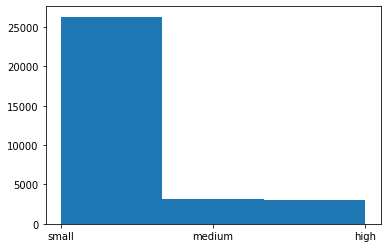

In [ ]:
plt.hist(adult3['bins'], bins=3)

Let's put our **CRITICAL THINKING** hats on: The cutoffs for the bins that we have calculated were:
* Group 1: 20,002.00000 to 79,989.6666667
* Group 2: 79,989.6666667 to 139,977.3333333
* Group 3: 139,977.3333333 to 199,965.0000000

What we are seeing here is that a huge majority (26,397) of our datapoints falls into the "small" category, so below 79,989.67, whereas a joint 6,250 or so falls into the medium and high categories.

Are these bins useful? Not really. The only thing they show us is that we have a whole lot of poor people in our dataset. Let's go back to the 5-number summary:

In [ ]:
adult3.incomeUSD.describe()

count     32561.000000
mean      56583.900587
std       44374.594314
min       20002.000000
25%       29994.000000
50%       39732.000000
75%       49631.000000
max      199965.000000
Name: incomeUSD, dtype: float64

###Bucketing
We see that the income ranges from 20,002 to 199,965, with a median at $39,732. That's not even a fifth of the top salary! Such a low median means that 50% of the people in our dataset make less than 39,732 while the remaining 50% inhabit the range from 39,732 to 199,965. In fact, only 25% of people earn between 49,611 (Q3) and the top salary. Wouldn't it be interesting to see how many earners we have in the top range, between, say 150,000 and 199,000?

That's where **BUCKETS** come in. 

With buckets, you set the interval cutoffs manually. So, how about we make 5 buckets: 
* poor (20002 to the median of 39732)
* low-wage-earners (median of 39732 to Q3 aka 49631)
* middle-class (49631 to 79989 (which was the previous Group 2 cutoff))
* rich (79989 to 150000)
* super-rich (150000 to 199965)

You're probably noticing that these buckets aren't the same size. With bucketing, that's not the point. We get to make the cutoffs.

Now, let's code this.


In [ ]:
# Setting up our 5 buckets and their labels
buckets = [ 20002, 39732, 49631, 79989, 150000, 199965 ]
bucketlabels = ['poor', 'low-wage-earners', 'middle-class', 'rich', 'super-rich']

# Using cut() to separate data into the buckets we have built
adult3['buckets'] = pd.cut(adult3['incomeUSD'] , bins=buckets, labels=bucketlabels, include_lowest=True)

# Check if we have the new attribute 'buckets' at the end of our dataset
adult3.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num,bins,buckets
0,39,Government,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747,4,small,low-wage-earners
1,50,Self-employed,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907,4,small,poor
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055,4,small,poor
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733,2,small,poor
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429,2,small,poor


In [ ]:
# Checking the contents of our buckets
adult3.groupby(['buckets']).count()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num,bins
buckets,,,,,,,,,,,,,,
poor,16281,16281,16281,16281,16281,16281,16281,16281,16281,16281,16281,16281,16281,16281
low-wage-earners,8142,8142,8142,8142,8142,8142,8142,8142,8142,8142,8142,8142,8142,8142
middle-class,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884,1884
rich,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654,3654
super-rich,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600,2600


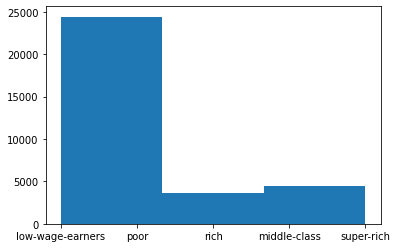

In [ ]:
# Plotting the distribution now
plt.hist(adult3['buckets'], bins=3)
plt.show()

###**CRITICAL THINKING MOMENT**
As you can see, bucketing gives us much better information about our dataset, but we needed to use binning to point us in the right direction! Now, look at these three bucket cutoffs again:

* poor (20002 to the median of 39732)
* rich (79989 to 150000)
* super-rich (150000 to 199965)

We are seeing that the number of poor people is still vastly bigger than the numbers of rich and super-rich people. **AND** we see that most of the poverty is concentrated between 20002 and 39732--that's a range of less than 20000--whereas the range of rich to super-rich income is much larger, from 79989 to 199965--that's 120000!

**WOW!**

**DISCLAIMER**: Of course, we are evaluating the income from an American perspective, even though the numbers come from countries all over the world, and we are not looking at buying power by country, at all. For example, 39732 buys much more in a country like Germany than it does in the US. So, to get more balanced insights, we would have to do much more investigating!

##**4.3 Normalization and Standardization**
A third type of Discretization, which will become critical when we talk about Neural Networks, helps us compare the values inside numeric attributes in a dataset by putting them all on the same scale.

Below, I will show you the most popular method for normalization, with the MixMaxScaler from the new-to-you scikit-learn package, which transforms values to a scale from 0 to 1. Then, I will show you two methods for standardization: A basic pandas method and the StandardScaler from the--you guessed it--scikit-learn package

**CRITICAL THINKING MOMENT**
Which data would we want to compare? Typically the ones that can have meaning for one another, like the ones with the same units. So here, we will use age and educationyears to normalize because both are in the same unit: Years. 

First, we will pull out these two numeric attributes into their own dataframe. That will make our processing faster and easier

In [ ]:
adult_years = adult.iloc[:,[0,3]]
adult_years.head()

,age,educationyears
0,39,13
1,50,13
2,38,9
3,53,7
4,28,13


In [ ]:
# Better safe than sorry! Let's check the dataypes.
adult_years.dtypes

age               int64
educationyears    int64
dtype: object

###Normalization with scikit-learn
Scikit-learn is a scientific package that allows us to do biased estimating, based on how you tell the algorithm to calculate the normalization range. Some data scientists prefer the MixMax method over the pandas method because it gives more control over how to scale the attributes. The most popular approach is [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales and translates each attribute individually such that it falls between zero and one.

In [ ]:
# Normalization with MinMaxScaler

from sklearn import preprocessing # the package

adult_years1 = adult_years # backing up my dataframe--you never know!
x = adult_years1.values # pulling out just the array values

# Now we are using the scaler
min_max_scaler = preprocessing.MinMaxScaler()

# Check the link above for more explanation of this line
x_scaled = min_max_scaler.fit_transform(x) 

adult_years1 = pd.DataFrame(x_scaled)
adult_years1 # We should now be seeing all values between 0 and 1.

,0,1
0,0.301370,0.800000
1,0.452055,0.800000
2,0.287671,0.533333
3,0.493151,0.400000
4,0.150685,0.800000
...,...,...
32556,0.136986,0.733333
32557,0.315068,0.533333
32558,0.561644,0.533333
32559,0.068493,0.533333


###Standardization with scikit-learn
Standardization is typically when values are organized around the mean and divided by the standard deviation. The fastest approach here is the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from scikit-learn.

In [ ]:
# Standardization with StandardScaler

from sklearn.preprocessing import StandardScaler # the package

adult_years2 = adult_years # backing up my dataframe--you never know!
scaler = StandardScaler() # setting an abbreviation to make things easier

#adult_years2 = scaler.fit_transform(adult_years3.to_numpy()) # if you want to add an extra transformation to a numpy array
adult_years2 = scaler.fit_transform(adult_years2.to_numpy())

adult_years2

array([[ 0.03067056,  1.13473876],
       [ 0.83710898,  1.13473876],
       [-0.04264203, -0.42005962],
       ...,
       [ 1.42360965, -0.42005962],
       [-1.21564337, -0.42005962],
       [ 0.98373415, -0.42005962]])

### Standardization with pandas
Using pandas for normalization is pretty straightforward: From each data value in an attribute, we subtract the mean and divide by the standard deviation. We do this row by row, so we specify axis=0. (axis=1 means column, remember?).

Cycling through our data will require the lambda transformation we have seen in a previous module. To learn more about this lambda transformation, check [this link](https://www.analyticsvidhya.com/blog/2020/03/what-are-lambda-functions-in-python/)

In [ ]:
adult_years3 = adult_years.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
adult_years3.head()

,age,educationyears
0,0.030670,1.134721
1,0.837096,1.134721
2,-0.042641,-0.420053
3,1.057031,-1.197440
4,-0.775756,1.134721


**OH! WAIT! WHAT!!!!???** 

Compare these values to the output for the StandardScaler--do you notice anything?


### The Big Picture
If you don't want to build a separate dataframe, that's ok, but it takes up more processing power. You will have to work with iloc to tell Python which columns to transform (I am using adult3 below with the pandas transformation just because we did that last and because I don't want to break the original adult dataframe here)

In [ ]:
adult3.iloc[:,[0,3]] = adult.iloc[:,[0,3]].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
adult3.head()

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD,race_num,bins,buckets
0,0.030670,Government,Bachelors,1.134721,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,43747,4,small,low-wage-earners
1,0.837096,Self-employed,Bachelors,1.134721,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,38907,4,small,poor
2,-0.042641,Private,HS-grad,-0.420053,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,25055,4,small,poor
3,1.057031,Private,11th,-1.197440,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,26733,2,small,poor
4,-0.775756,Private,Bachelors,1.134721,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,23429,2,small,poor


##**Your Turn**
Now apply the MinMaxScaler to the age and educationyears attribute throughout the ENTIRE adult dataset (back it up as adult4 so you can always quickly replace it). For this, you will combine code from the MinMaxScaler normalization with the code directly above that applies the transformation to specific columns/ attributes/ dimensions/ features in the dataset.